<a href="https://colab.research.google.com/github/ranjuadhikari14/Teleco_Customer_Churn/blob/main/Teleco_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as pyplot
import numpy as np
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2552,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,26.9,1250.85,No
5843,1480-IVEVR,Male,1,Yes,No,35,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,One year,Yes,Bank transfer (automatic),81.6,2815.25,No
5018,6928-ONTRW,Female,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.7,1379.8,No
3458,0311-UNPFF,Female,0,No,No,26,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),88.8,2274.35,Yes
6871,4070-OKWVH,Female,0,Yes,No,52,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic),94.6,5025.8,No


In [ ]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df.iloc[488]['TotalCharges']

' '

In [ ]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [ ]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/tmp/ipython-input-25-973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [ ]:
df1.TotalCharges.dtypes

dtype('float64')

In [ ]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure


In [ ]:
tenure_churn_no

,tenure
0,1
1,34
3,45
6,22
7,10
...,...
7037,72
7038,24
7039,72
7040,11


In [ ]:
tenure_churn_yes

,tenure
2,2
4,2
5,8
8,28
13,49
...,...
7021,12
7026,9
7032,1
7034,67


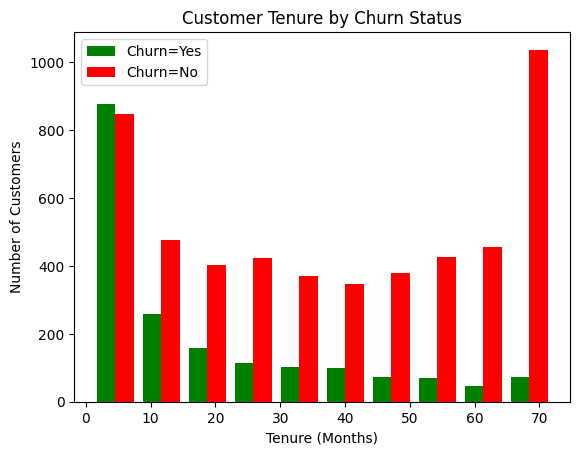

In [ ]:
plt.hist([tenure_churn_yes, tenure_churn_no],
         color=['green', 'red'],
         label=['Churn=Yes', 'Churn=No'])

plt.title('Customer Tenure by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()


In [ ]:
MonthlyCharges_no=df1[df1.Churn=='No'].MonthlyCharges
MonthlyCharges_yes=df1[df1.Churn=='Yes'].MonthlyCharges

In [ ]:
MonthlyCharges_no

,MonthlyCharges
0,29.85
1,56.95
3,42.30
6,89.10
7,29.75
...,...
7037,21.15
7038,84.80
7039,103.20
7040,29.60


In [ ]:
MonthlyCharges_yes

,MonthlyCharges
2,53.85
4,70.70
5,99.65
8,104.80
13,103.70
...,...
7021,59.80
7026,44.20
7032,75.75
7034,102.95


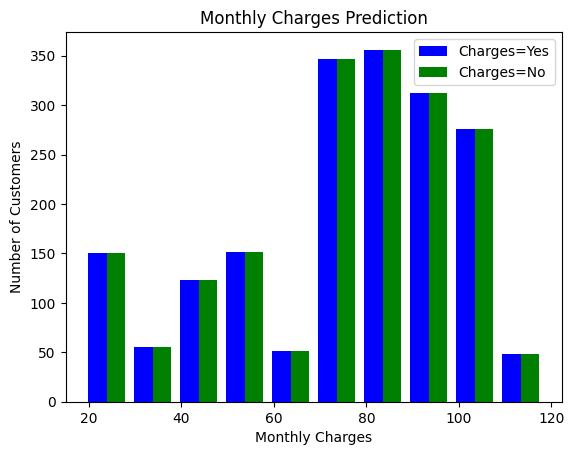

In [ ]:
plt.hist([MonthlyCharges_yes, MonthlyCharges_yes],
         color=['blue', 'green'],
         label=['Charges=Yes', 'Charges=No'])

plt.title('Monthly Charges Prediction')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()


In [ ]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object' :
     print(f'{column} : { df[column].unique()}')

In [ ]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)


/tmp/ipython-input-48-2589434152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
/tmp/ipython-input-48-2589434152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [ ]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
yes_no_columns= {'Partner','Dependents' ,'PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn'}
for col in yes_no_columns:
  df1[col].replace({'Yes':1,'No':0},inplace=True)

/tmp/ipython-input-51-4030286396.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1,'No':0},inplace=True)
/tmp/ipython-input-51-4030286396.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':1,'No':0},inplace=True)
/tmp/ipython-input-51-4030286396.p

In [ ]:
for col in df:
  print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [ ]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)



/tmp/ipython-input-54-2623009329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
/tmp/ipython-input-54-2623009329.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
/tmp/ipython-i

In [ ]:
df1['gender'].unique()

array([1, 0])

In [ ]:
pd.get_dummies(data=df1, columns=['InternetService'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,True,False,False
1,0,0,0,0,34,1,0,1,0,1,...,0,One year,0,Mailed check,56.95,1889.50,0,True,False,False
2,0,0,0,0,2,1,0,1,1,0,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,True,False,False
3,0,0,0,0,45,0,0,1,0,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,True,False,False
4,1,0,0,0,2,1,0,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,One year,1,Mailed check,84.80,1990.50,0,True,False,False
7039,1,0,1,1,72,1,1,0,1,1,...,1,One year,1,Credit card (automatic),103.20,7362.90,0,False,True,False
7040,1,0,1,1,11,0,0,1,0,0,...,0,Month-to-month,1,Electronic check,29.60,346.45,0,True,False,False
7041,0,1,1,0,4,1,1,0,0,0,...,0,Month-to-month,1,Mailed check,74.40,306.60,1,False,True,False


In [ ]:
df2=pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2366,1,1,0,0,1,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
5483,1,0,1,0,55,1,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
655,0,0,0,0,10,1,0,0,0,0,...,False,True,False,True,False,False,False,True,False,False
4942,0,0,1,1,4,1,1,0,0,0,...,True,False,False,True,False,False,False,False,True,False


In [ ]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [ ]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [ ]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6475,1,0,0,1,0.253521,1,1,1,1,0,...,True,False,False,True,False,False,False,False,False,True
4462,1,0,0,0,0.211268,1,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
73,0,0,1,1,0.859155,1,1,0,0,0,...,False,False,True,False,False,True,True,False,False,False


In [ ]:
for col in df2:
  print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [ ]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5
)


In [ ]:
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
101,1,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
2621,0,0,1,0,0.985915,1,0,0,1,1,...,True,False,False,False,False,True,False,True,False,False
392,1,1,0,0,0.014085,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1327,0,0,1,0,0.816901,1,1,0,0,1,...,False,True,False,False,True,False,True,False,False,False
3607,1,0,0,0,0.169014,1,0,1,0,0,...,True,False,False,False,True,False,False,False,False,True
2773,0,0,1,0,0.323944,0,0,0,0,1,...,True,False,False,True,False,False,False,False,True,False
1936,1,0,1,0,0.704225,1,0,1,1,0,...,True,False,False,False,True,False,True,False,False,False
5387,0,0,0,0,0.042254,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
4331,0,0,0,0,0.985915,1,1,0,0,0,...,False,False,True,False,False,True,True,False,False,False


In [ ]:
len(X_train.columns)

26

In [ ]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),

    keras.layers.Dense(1,activation='sigmoid'),

    ])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5927 - loss: 0.6507
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8029 - loss: 0.4232
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8022 - loss: 0.4166
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7963 - loss: 0.4266
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8068 - loss: 0.4088
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8089 - loss: 0.4085
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8054 - loss: 0.4168
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8106 - loss: 0.4094
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8052 - loss: 0.4091
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8138 - loss: 0.3988
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8152 - loss: 0.3931
Epoch 12/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [ ]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7851 - loss: 0.4403


[0.4422665238380432, 0.7867803573608398]

In [ ]:
yp=model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.27104363],
       [0.57524216],
       [0.01213658],
       [0.76821077],
       [0.53225404]], dtype=float32)

In [ ]:
y_test[:10]

,Churn
2660,0
744,0
5579,1
64,1
3287,1
816,1
2670,0
5920,0
1023,0
6087,0


In [ ]:
y_pred=[]
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
      y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 1, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       999
           1       0.64      0.60      0.62       408

    accuracy                           0.79      1407
   macro avg       0.74      0.73      0.74      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

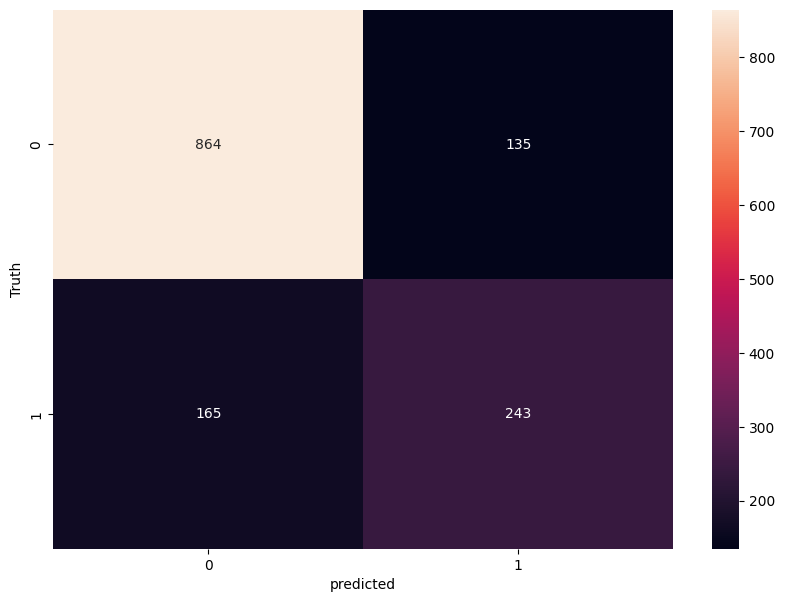

In [ ]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
accuracy=round((864+243)/(864+135+165+243),2)
accuracy

0.79

Precision for 0 class.ie Precision for customers who didnot churn


In [1]:
round(864/(864+165),2)

0.84

Precision for 1 class ie.precision for customer who actually churned


In [2]:
round(243/(243+135),2)

0.64

Recall for 0 class

In [3]:
round(864/(864+137),2)

0.86

In [4]:
round(243/(243+165),2)

0.6